In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
earn_df = pd.read_csv('Earnings Manipulation 220.csv')
earn_df.head()

,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
0,1,31-03-2014,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,2,31-03-2009,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,3,31-03-2008,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,4,31-03-2014,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,5,31-03-2010,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


In [7]:
earn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  220 non-null    int64  
 1   Year Ending   220 non-null    object 
 2   DSRI          220 non-null    float64
 3   GMI           220 non-null    float64
 4   AQI           220 non-null    float64
 5   SGI           220 non-null    float64
 6   DEPI          220 non-null    float64
 7   SGAI          220 non-null    float64
 8   ACCR          220 non-null    float64
 9   LEVI          220 non-null    float64
 10  MANIPULATOR   220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB


**Q8. How many cases of manipulators versus non-manipulators are there in the dataset? Draw a bar plot to depict.**

**Ans:-**

In [8]:
earn_df.MANIPULATOR.value_counts()

MANIPULATOR
0    181
1     39
Name: count, dtype: int64

Here we have 39 cases of Manipulators and 181 cases of Non-Manipulators.

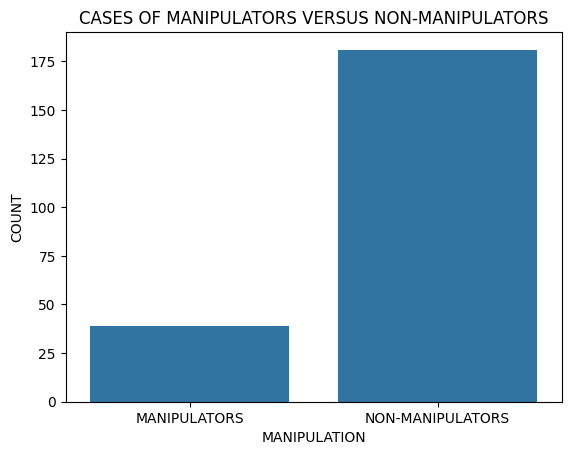

In [9]:
labels = ["MANIPULATORS", "NON-MANIPULATORS"]
counts = [39, 181]
count_df = pd.DataFrame({ 'MANIPULATION': labels, 'COUNT': counts})
sn.barplot(x='MANIPULATION', y='COUNT', data=count_df)
plt.xlabel('MANIPULATION')
plt.ylabel('COUNT')
plt.title('CASES OF MANIPULATORS VERSUS NON-MANIPULATORS')
plt.show()

**Q9. Create a 80:20 partition, and find how many positives are present in the test data.**

**Ans:-**

In [29]:
X_features = list(earn_df.columns)
categorical_features = ['MANIPULATOR', 'Company Name', 'Year Ending']
X_features = [x for x in X_features if x not in categorical_features]
X_features

['DSRI', 'GMI', 'AQI', 'SGI', 'DEPI', 'SGAI', 'ACCR', 'LEVI']

In [30]:
X = earn_df[X_features]
Y = earn_df.MANIPULATOR

In [31]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
test_y.value_counts()

MANIPULATOR
0    38
1     6
Name: count, dtype: int64

So in the test data, the number of positives is 6.

**Q10. The number of cases of manipulators are evry less compared to non-manipulators. Use upsampling technique to create a balanced dataset.**

**Ans:-**

In [35]:
from sklearn.utils import resample

earn_stat_df_no = earn_df[earn_df['MANIPULATOR'] == 0]
earn_stat_df_yes = earn_df[earn_df['MANIPULATOR'] == 1]

df_minority_upsampled = resample(earn_stat_df_yes, replace=True, n_samples=181)
up_earn_df = pd.concat([earn_stat_df_no, df_minority_upsampled])

In [36]:
from sklearn.utils import shuffle
up_earn_df = shuffle(up_earn_df)

**Q11. Build the following models using balanced dataset and compare the accuracies. Use ROC AUC score for accuracy.**

* **Random Forest**
* **AdaBoost with Logistic Regression as base estimator**
* **Gradient Boosting**

**Ans:-**

In [40]:
X_u = up_earn_df[X_features]
Y_u = up_earn_df.MANIPULATOR

In [41]:
train_X_u, test_X_u, train_y_u, test_y_u = train_test_split(X_u, Y_u, test_size=0.2, random_state=42)

In [47]:
from sklearn import metrics
def draw_roc_curve(model, test_X, test_y):
    test_results_df = pd.DataFrame({'actual': test_y})
    test_results_df = test_results_df.reset_index()

    predict_proba_df = pd.DataFrame(model.predict_proba(test_X))
    test_results_df['chd_1'] = predict_proba_df.iloc[:, 1:2]

    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate=False)

    auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)

    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)

    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate or [1 - true Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterisic Example')
    plt.legend(loc='lower right')
    plt.show()

    return auc_score, fpr, tpr, thresholds

In [48]:
from sklearn.ensemble import RandomForestClassifier

radm_clf_u = RandomForestClassifier(max_depth=10, n_estimators=10)

radm_clf_u.fit(train_X_u, train_y_u)

RandomForestClassifier(max_depth=10, n_estimators=10)

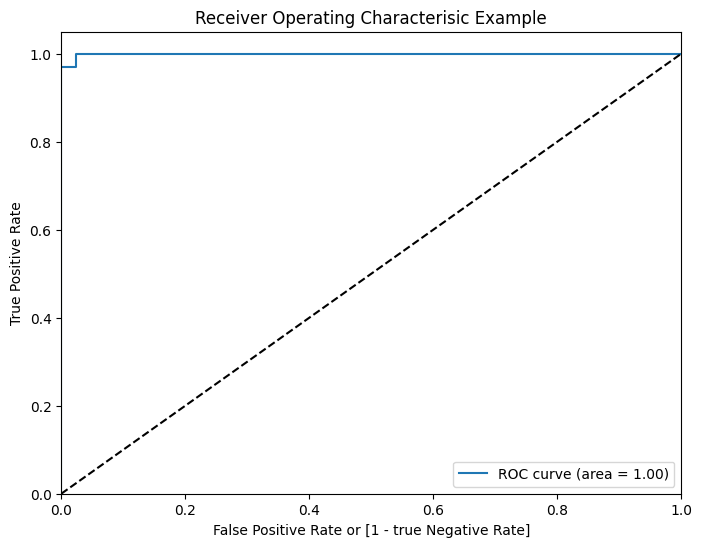

In [49]:
_, _, _, _ = draw_roc_curve(radm_clf_u, test_X_u, test_y_u)

In [51]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores_u = cross_val_score(radm_clf_u, X_u, Y_u, cv=kfold, scoring='roc_auc') 
print("ROC AUC for each fold:", scores_u)
print("Mean ROC AUC:", round(scores_u.mean(), 2))

ROC AUC for each fold: [1.         0.99411765 1.         0.95317726 1.         1.
 1.         1.         1.         0.99071207]
Mean ROC AUC: 0.99


 **AdaBoost**

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

logreg_clf_u = LogisticRegression()

ada_clf_u = AdaBoostClassifier(logreg_clf_u, n_estimators=50)

ada_clf_u.fit(train_X_u, train_y_u)

AdaBoostClassifier(estimator=LogisticRegression())

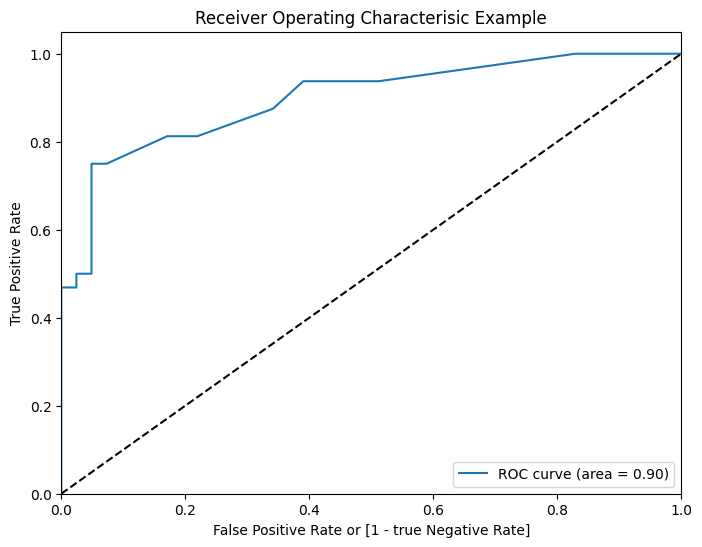

In [54]:
_, _, _, _ = draw_roc_curve(ada_clf_u, test_X_u, test_y_u)

**Gradient Boosting**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_clf_u = GradientBoostingClassifier(n_estimators=500, max_depth=10)
gboost_clf_u.fit(train_X_u, train_y_u)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

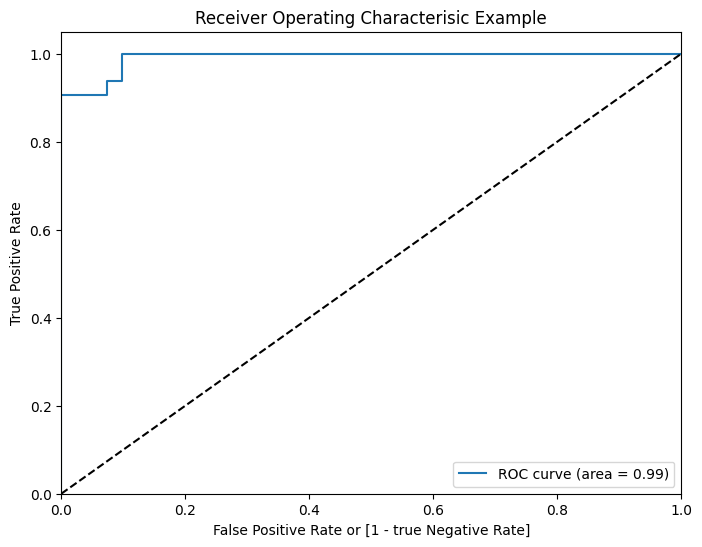

In [71]:
_, _, _, _ = draw_roc_curve(gboost_clf_u, test_X_u, test_y_u)

**Q12. The number of cases of manipulators are very less compared to non-manipulators. Use downsampling technique to create a balance dataset.**

**Ans:-**

In [57]:
from sklearn.utils import resample

earn_stat_df_no = earn_df[earn_df['MANIPULATOR'] == 0]
earn_stat_df_yes = earn_df[earn_df['MANIPULATOR'] == 1]

df_minority_downsampled = resample(earn_stat_df_no, replace=True, n_samples=39)
down_earn_df = pd.concat([earn_stat_df_yes, df_minority_downsampled])

In [59]:
X_d = down_earn_df[X_features]
Y_d = down_earn_df.MANIPULATOR

In [60]:
train_X_d, test_X_d, train_y_d, test_y_d = train_test_split(X_d, Y_d, test_size=0.2, random_state=42)

**Random Forest Classifier**

In [61]:
from sklearn.ensemble import RandomForestClassifier

radm_clf_d = RandomForestClassifier(max_depth=10, n_estimators=10)

radm_clf_d.fit(train_X_d, train_y_d)

RandomForestClassifier(max_depth=10, n_estimators=10)

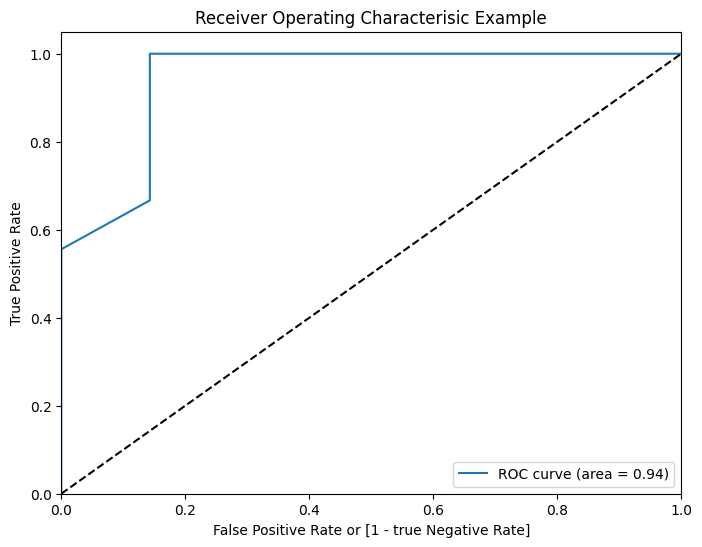

In [62]:
_, _, _, _ = draw_roc_curve(radm_clf_d, test_X_d, test_y_d)

**AdaBoost**

In [64]:
logreg_clf_d = LogisticRegression()

ada_clf_d = AdaBoostClassifier(logreg_clf_d, n_estimators=50)

ada_clf_d.fit(train_X_d, train_y_d)

AdaBoostClassifier(estimator=LogisticRegression())

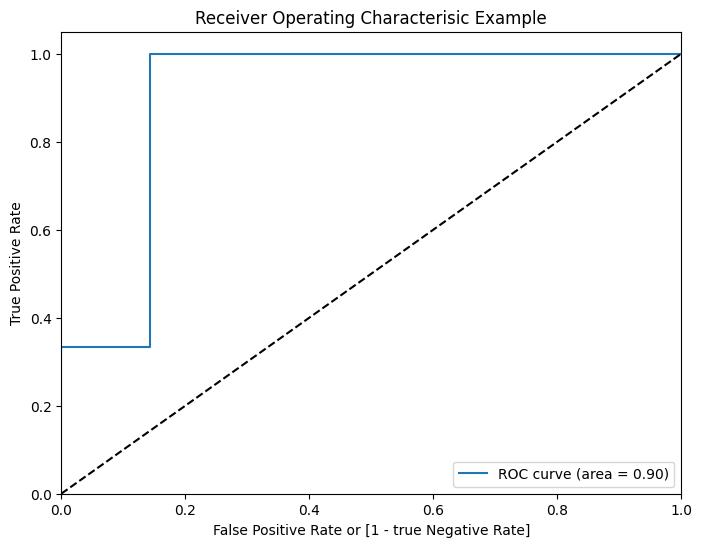

In [65]:
_, _, _, _ = draw_roc_curve(ada_clf_d, test_X_d, test_y_d)

**Gradient Boost**

In [66]:
gboost_clf = GradientBoostingClassifier(n_estimators=500, max_depth=10)
gboost_clf.fit(train_X_d, train_y_d)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

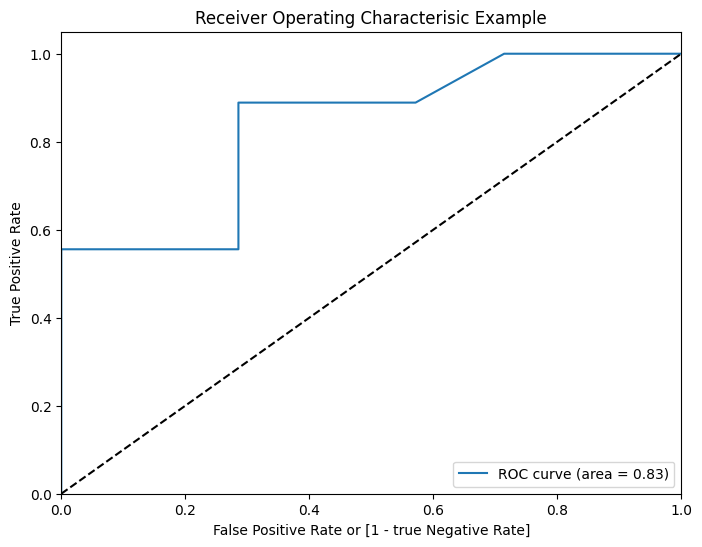

In [67]:
_, _, _, _ = draw_roc_curve(gboost_clf, test_X_d, test_y_d)

**Q13. Compare the results of using both upsampling and downsampling techniques. Report the best model of all the models.**

**Ans:-**

Seeing all the models and the sampling, we can say that the GBoost Model of Upsampling is the best.

**Q14. Report the features importance of the best model and explain how many features explain the variance in the data.**

**Ans:-**

In [74]:
gboost_clf_u.feature_importances_

array([0.27674426, 0.00687991, 0.02424142, 0.12112587, 0.10197351,
       0.01501255, 0.35781866, 0.09620382])

<Axes: xlabel='importance', ylabel='feature'>

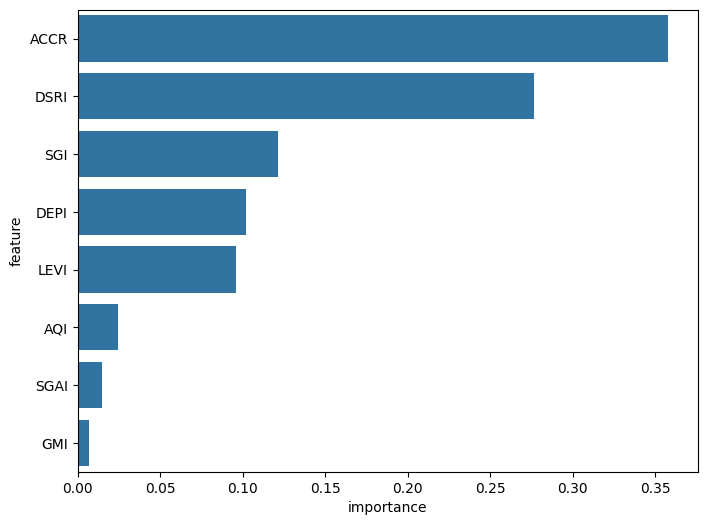

In [75]:
feature_rank = pd.DataFrame({'feature': train_X_u.columns, 'importance': gboost_clf_u.feature_importances_})

feature_rank = feature_rank.sort_values('importance', ascending=False)
plt.figure(figsize=(8, 6))
sn.barplot(y='feature', x='importance', data=feature_rank)

**Q15. Use Youden's index to find most optimal cutoff probability value for the best model chose in in 13. Report the precision and recall for manipulator and non-manipulator cases.**

**Ans:-**

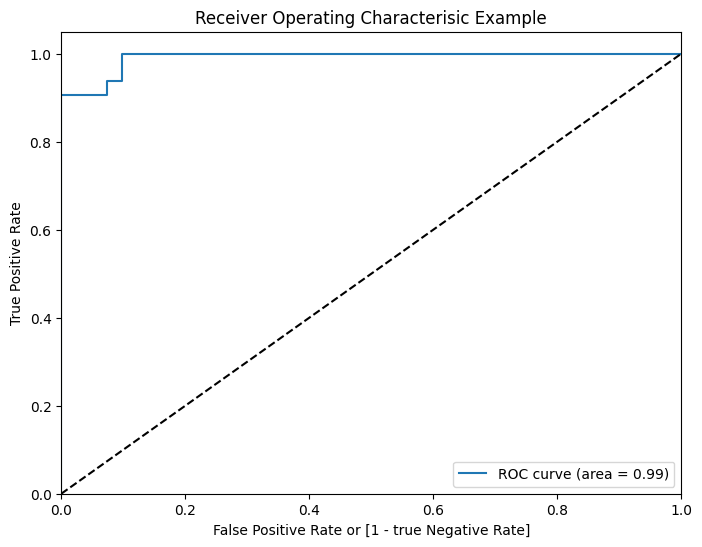

In [76]:
auc_score, tpr, fpr, thresholds = draw_roc_curve(gboost_clf_u, test_X_u, test_y_u)

In [77]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending=False)[0:5]

,tpr,fpr,thresholds,diff
0,0.00000,0.00000,inf,0.00000
34,1.00000,1.00000,1.139648e-08,0.00000
33,0.97561,1.00000,1.217773e-08,-0.02439
1,0.00000,0.06250,1.000000e+00,-0.06250
2,0.00000,0.09375,1.000000e+00,-0.09375
